In [1]:
#importing the libraries
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Load the data
titanic = sns.load_dataset('titanic')
#Print the first 10 rows of data
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [3]:
#Count the number of rows and columns in the data set 
titanic.shape

(891, 15)

In [4]:
#description of data
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#Get a count of the number of survivors  
titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

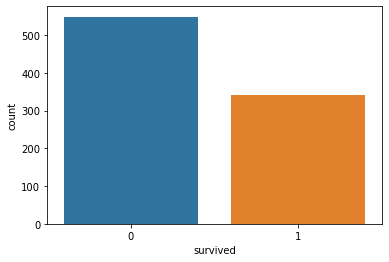

In [6]:
#Visualize the count of number of survivors
sns.countplot(titanic['survived'],label="Count")

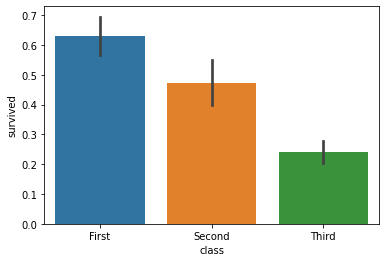

In [7]:
#Plot the survival rate of each class.
sns.barplot(x='class', y='survived', data=titanic)

In [8]:
#Count the empty (NaN, NAN, na) values in each column 
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [9]:
# Drop the columns
titanic = titanic.drop(['deck', 'embark_town', 'alive', 'class', 'alone', 'adult_male', 'who'], axis=1)

#Remove the rows with missing values
titanic = titanic.dropna(subset =['embarked', 'age'])

In [10]:
#Count the NEW number of rows and columns in the data set
titanic.shape

(712, 8)

In [11]:
#Print the unique values in the columns
print(titanic['sex'].unique())
print(titanic['embarked'].unique())

['male' 'female']
['S' 'C' 'Q']


In [12]:
#showing the first 10 rows
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C
10,1,3,female,4.0,1,1,16.7000,S


In [13]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
titanic['sex'] = le.fit_transform(titanic['sex'])
titanic['embarked'] = le.fit_transform(titanic['embarked'])


In [14]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
885,0,3,0,39.0,0,5,29.1250,1
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
889,1,1,1,26.0,0,0,30.0000,0


In [15]:
#Building the model
targetdf = titanic['survived']
datadf = titanic.drop(['survived'],axis =1)

In [26]:
#Split the data  into 80% training (x_trg and y_trg) and 20% testing (x_test and y_test) data sets.
np.random.seed(1000)
x_trg, x_test, y_trg, y_test = train_test_split(datadf, targetdf, random_state=0,test_size=0.2)
print("Dimension of training dataset:", x_trg.shape)
print("Dimension of test dataset:", x_test.shape)

Dimension of training dataset: (569, 7)
Dimension of test dataset: (143, 7)


In [27]:
#fitting the model
model = LogisticRegression()
model.fit(x_trg,y_trg)

C:\Users\Niharika\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
print("Training set score",model.score(x_trg,y_trg))
print("Test set score",model.score(x_test,y_test))

Training set score 0.8031634446397188
Test set score 0.8181818181818182


In [29]:
pred = model.predict(x_test)

Confusion matrix is used to show the performance of the
algorithm. Accuracy of the model can be predicted using the
confusion matrix. It is a plotting of relation between real and
predicted outputs. It allows us to check the accuracy and
performance of the algorithm.

In [30]:
results = confusion_matrix(y_test,pred)
print("Results of confusion matrix are \n",results)

Results of confusion matrix are 
 [[74  8]
 [18 43]]


In [21]:
x_trg.head(10)

,pclass,sex,age,sibsp,parch,fare,embarked
867,1,1,31.0,0,0,50.4958,2
332,1,1,38.0,0,1,153.4625,2
20,2,1,35.0,0,0,26.0000,2
606,3,1,30.0,0,0,7.8958,2
379,3,1,19.0,0,0,7.7750,2
314,2,1,43.0,1,1,26.2500,2
395,3,1,22.0,0,0,7.7958,2
590,3,1,35.0,0,0,7.1250,2
821,3,1,27.0,0,0,8.6625,2
293,3,0,24.0,0,0,8.8500,2


In [22]:
print("The accuracy is ", accuracy_score(y_test,pred))

The accuracy is  0.8181818181818182
